# MRW.npz : Exploratory Analysis

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ctes

In [2]:
plt.rcParams["figure.figsize"] = (20,20)

## Load data

In [3]:
data = np.load("/media/f22dimar/BC7D-0518/MRW.npz")
print(data.files)

['X', 'S', 'S_LABELS', 'N', 'win']


## Explore data

In [4]:
N = data[ctes.N]
print(f"{N = !s}")

N = 1048576


In [5]:
win = data[ctes.WIN]
print(f"{win = !s}")

win = 1


In [6]:
S_LABELS = data[ctes.S_LABELS]
print(f"{S_LABELS = !s}")

S_LABELS = ['L' 'eta' 'H' 'c1']


In [7]:
S = data[ctes.S]

In [8]:
print(f"{S.shape = !s}")
print(f"S.shape[-1] == len(S_LABELS) ? : {S.shape[-1] == len(S_LABELS)}")

S.shape = (400, 4)
S.shape[-1] == len(S_LABELS) ? : True


In [9]:
X = data[ctes.X]

In [10]:
print(f"{X.shape = !s}")
print(f"X.shape[-1] == N ? : {X.shape[-1] == N}")

X.shape = (400, 1048576)
X.shape[-1] == N ? : True


In [11]:
Ls = set()
etas = set()
Hs = set()
c1s = set()
for i in range(S.shape[0]):
    L, eta, H, c1 = S[i]
    Ls.add(L)
    etas.add(eta)
    Hs.add(H)
    c1s.add(c1)

Ls = sorted(Ls)
etas = sorted(etas)
Hs = sorted(Hs)
c1s = sorted(c1s)

print(f"{Ls = !s}")
print(f"{etas = !s}")
print(f"{Hs = !s}")
print(f"{c1s = !s}")

Ls = [1000.0, 2000.0, 3000.0, 4000.0, 5000.0]
etas = [0.5, 1.5, 2.5, 3.5, 4.5]
Hs = [0.22, 0.24, 0.26, 0.28, 0.42, 0.44, 0.46, 0.48, 0.62, 0.64, 0.66, 0.68, 0.82, 0.84, 0.86, 0.88]
c1s = [-0.08, -0.06, -0.04, -0.02]


## Reminder
Data was originally generated from all posible combination the following parameters:
* c1_ : parameter of long-range dependance. 
    * [0.2 0.4 0.6 0.8]
* c2_ : parameter of intermittency.
    * [0.02 0.04 0.06 0.08]
* epsilon_ : size of the small-scale regularization.
    * [1000 2000 3000 4000 5000]
* L_ : size of the integral scale.
    * [0.5 1.5 2.5 3.5 4.5]
    
and saved in `Pre_MRW.npz`.

Later, these generation parameters where transformed into the estimation targets: 
* L : size of the integral scale. 
    * L = L_
* eta : size of the small-scale regularization.
    * eta = epsilon_
* H : Hurst exponent.
    * H = c1_ + c2_
* c1 : Negative parameter of intermittency.
    * c1 = -c2_
    
In particular, there are more values of `H` than values of `c1_`, so some combination of these estimation targets are not in the dataset.



## Visualize data

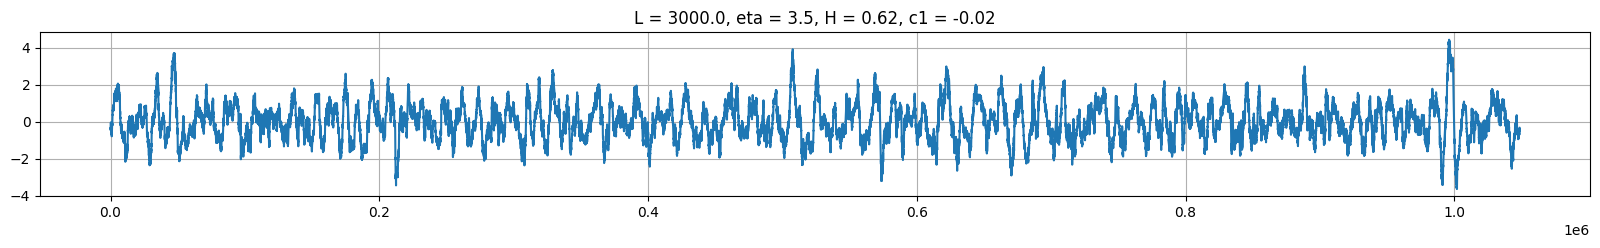

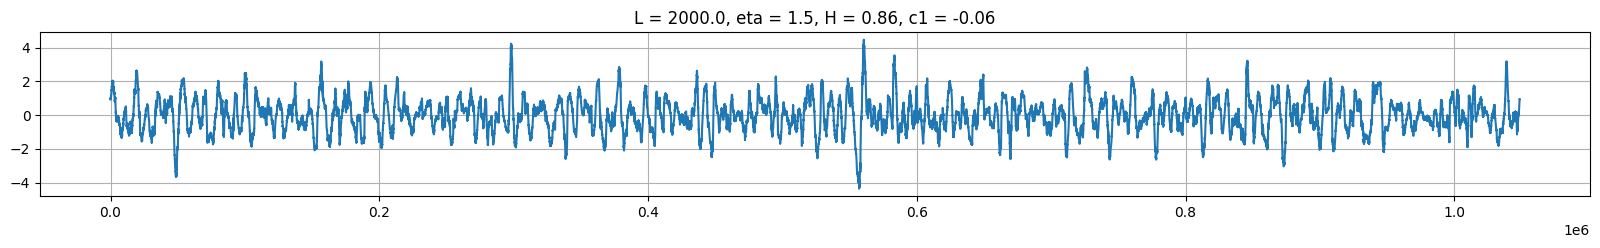

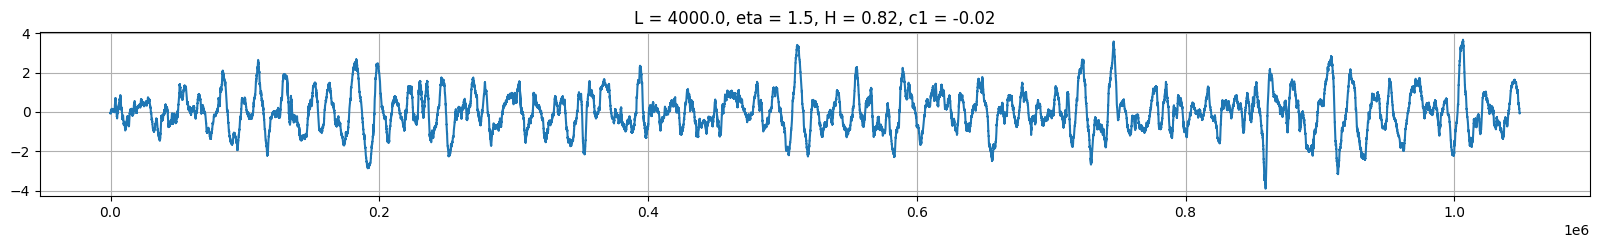

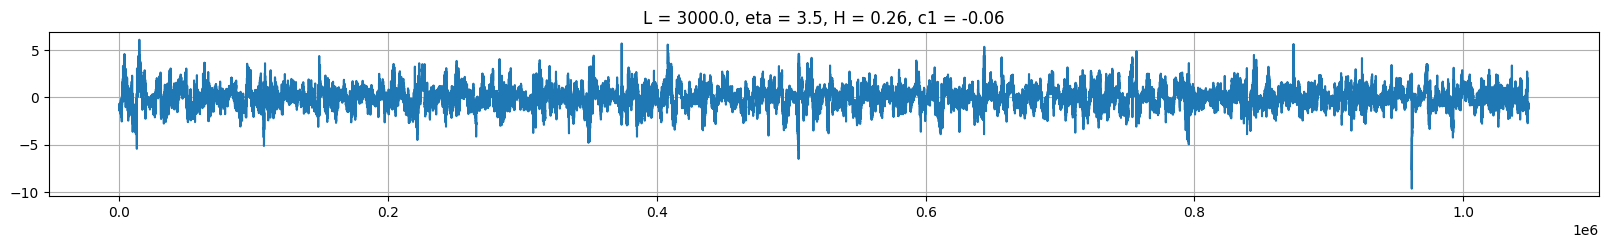

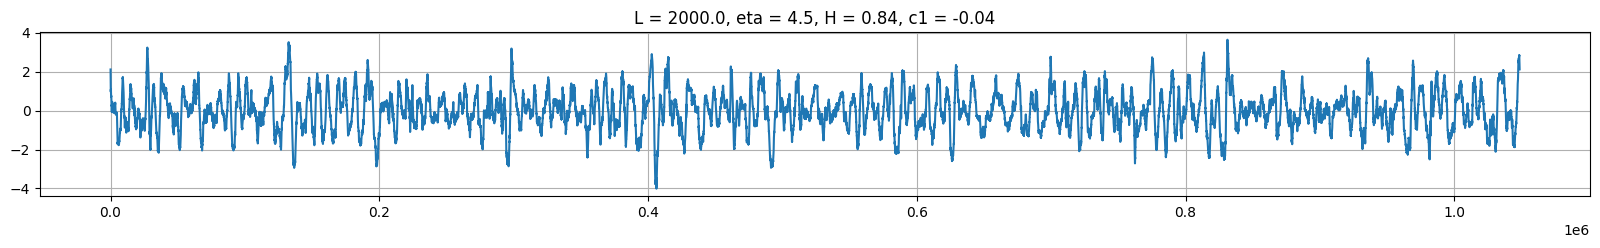

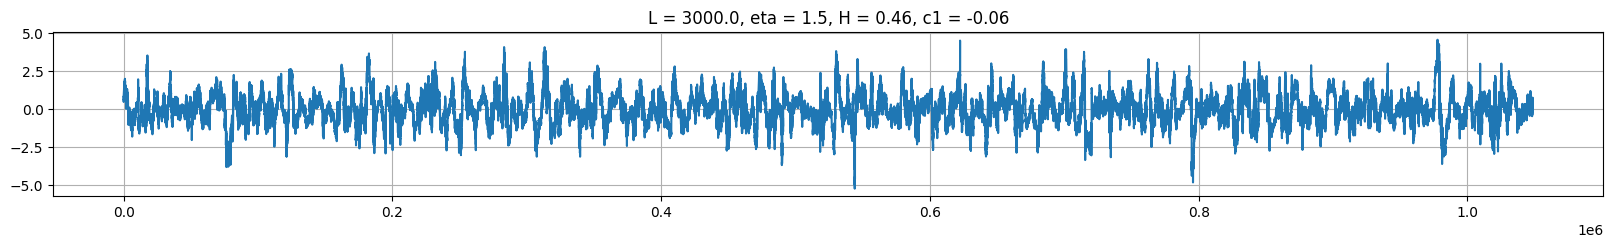

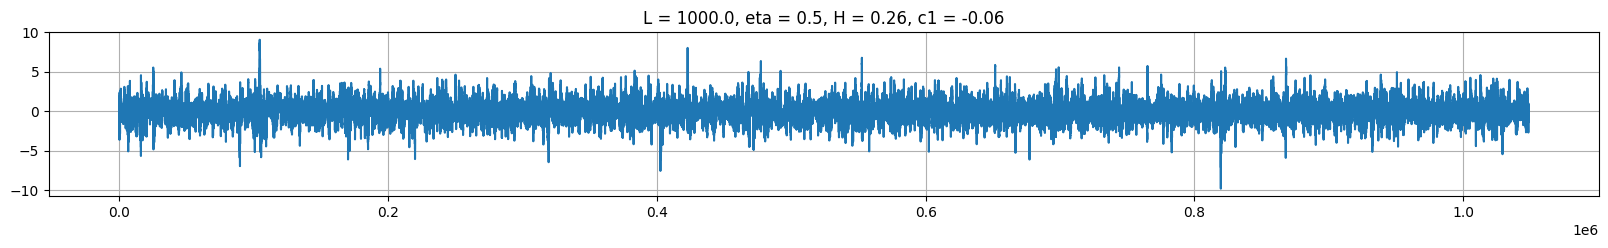

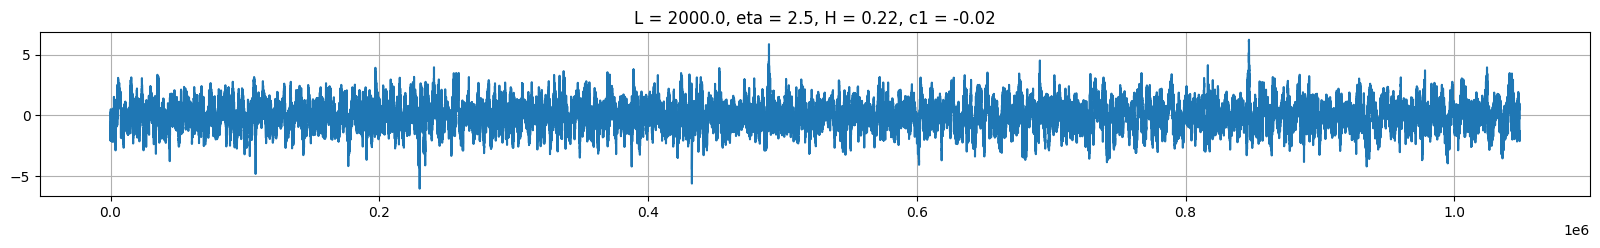

In [12]:
nb_plots = 8
index = np.random.choice(X.shape[0], nb_plots, replace=False)  
X_plots = X[index,:]
S_plots = S[index, :]
for i in range(nb_plots):
    x = np.linspace(1,N,N)
    y = X_plots[i,:]
    L, eta, H, c1 = S_plots[i]
    plt.figure()
    plt.subplot(nb_plots, 1, (i+1))
    plt.plot(x, y)
    plt.title(f"{L = !s}, {eta = !s}, {H = !s}, {c1 = !s}")
    plt.grid()
plt.show()